<a href="https://colab.research.google.com/github/Hoanghai809/Code-Example/blob/main/hocmaylab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset lenght:  14
Dataset shape:  (14, 5)
Dataset:      outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes
------------------------------------------------------
    outlook  temp  humidity  windy
0       2.0   1.0       0.0    0.0
1       2.0   1.0       0.0    1.0
2       0.0   1.0       0.0    0.0
3       1.0   2.0       0.0    0.0
4       1.0   0.0       1.0    0.0
5       1.0   0.0       1.0    1.0
6       0.0   0.0       1.0    1.0
7       2.0   2.0       0.0    0.0
8       2.0   0.0       1.0    0.0
9       1.0   2.0       1.0    0.0
10      2.0   2.0       1.0    1.0
11      0.0   2.0       0.0    1.0
12      0.0   1.0       1.0    0.0
13      1.0   2.0       0.0    1.0
0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13

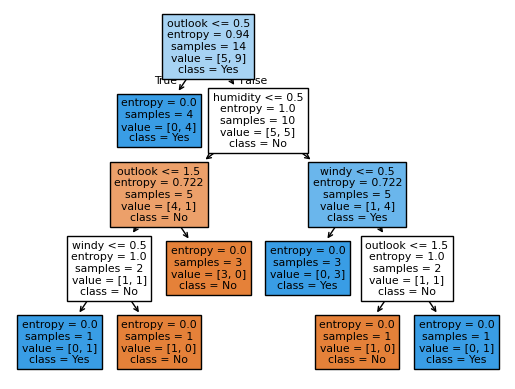

In [28]:
from re import L
import numpy as np
import pandas as pb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

def importdata():
  balance_data = pb.read_csv('sample_data/PlayTennis.csv', sep= ',')

  print ("Dataset lenght: ", len(balance_data))
  print ("Dataset shape: ", balance_data.shape)

  print ("Dataset: ",balance_data.head())
  return balance_data

b_data = importdata()
print('------------------------------------------------------')
def splitdataset(balance_data):
  Le = LabelEncoder()
  balance_data['outlook'] = Le.fit_transform(balance_data['outlook']).astype(float)
  balance_data['temp'] = Le.fit_transform(balance_data['temp']).astype(float)
  balance_data['humidity'] = Le.fit_transform(balance_data['humidity']).astype(float)
  balance_data['windy'] = Le.fit_transform(balance_data['windy']).astype(float)
  balance_data['play'] = Le.fit_transform(balance_data['play']).astype(float)

  Y = balance_data['play']
  X = balance_data.drop(['play'], axis=1)

  return X, Y
X, Y = splitdataset(b_data)

print(X)
print(Y)
print('------------------------------------------------------')
def train_using_entropy(X_train, y_train):
  clf_entropy = DecisionTreeClassifier(criterion = "entropy")
  clf_entropy.fit(X_train, y_train)
  return clf_entropy

def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print("Predicted values:")
  print(y_pred)
  return y_pred

def cal_accuracy(y_test, y_pred):
  print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
  print("Report : ", classification_report(y_test, y_pred))
print('------------------------------------------------------')

def main():
  data = importdata()
  X, Y = splitdataset(data)
  clf_entropy = train_using_entropy(X, Y)
  print('------------------------------------------------------')
  print('Results Using Entropy:')
  y_pred_entropy = prediction(X, clf_entropy)
  cal_accuracy(Y, y_pred_entropy)
  print('------------------------------------------------------')
  print(tree.export_text(clf_entropy, feature_names=['outlook', 'temp', 'humidity', 'windy']))

  tree.plot_tree(clf_entropy, feature_names=['outlook', 'temp', 'humidity', 'windy'], class_names=['No', 'Yes'], filled=True)
  dot_data = tree.export_graphviz(clf_entropy, out_file=None)

if __name__=="__main__":
  main()


# New Section

In [ ]:
import numpy as np
import pandas as pb

def importdata():
  balance_data = pb.read_csv('sample_data/PlayTennis.csv', sep= ',')

  print ("Dataset lenght: ", len(balance_data))
  print ("Dataset shape: ", balance_data.shape)

  print ("Dataset: ",balance_data.head())
  return balance_data
b_data = importdata()
def entropy(colum):
